In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import tur_calculator as tc



In [53]:
#Coulumb diamonds

#--SETUP: ---------------------------------------------------------------------------------
VBs = np.linspace(-200,200, 20) # np.linspace(-10000,10000, 100)
epsilons = np.linspace(-500, 50, 20) # np.linspace(-6000, 6000, 10)
#T = 1
T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------

importlib.reload(vs)
I, I_var, J_QH, P, P_0 = vs.run_sweep(VBs, epsilons, **INPUT)

In [54]:
Epsilon, VB = np.meshgrid(epsilons, VBs)

#Beräkna TUR
importlib.reload(tc)
TUR, eff_carnot, eff, sigma = tc.calculate_tur(T_L=T_L, T_R=T_R, I=I, I_var=I_var, J_QH=J_QH, P=P)
print(np.sort(TUR[~np.isnan(TUR)]))

min_value = np.nanmin(TUR)  # Ignores NaNs
print(min_value)
# Find the index of this minimum value
min_idx = np.argwhere(TUR == min_value)
print(min_idx)

[   2.04574863    2.68925795    3.43837915    5.3177112     6.85671465
    7.90062134    8.42476848    8.5037971     9.4013606    11.57915359
   13.16745756   15.06307136   17.89475824   22.63157648   24.21087028
   28.94211624   35.34126022 1921.6069692 ]
2.045748632122854
[[9 3]]


In [55]:
print(I)

[[ 7.12695452e-04  1.23076923e-03  1.23076923e-03  1.23076828e-03
   8.08080855e-04  8.08080811e-04  8.08083948e-04  1.11695745e-04
   1.34184382e-11  1.34184022e-11  1.33985067e-11  1.34184257e-11
   1.48051623e-11  1.48127919e-07  7.49820706e-04  8.08080204e-04
   8.08080938e-04  8.21338971e-04  1.23066086e-03  1.23076923e-03]
 [ 5.23317763e-08  1.23076922e-03  1.23076923e-03  1.23076923e-03
   8.09737586e-04  8.08080812e-04  8.08292051e-04  9.74207864e-04
   1.48051727e-11  1.34183862e-11  1.28909583e-11  1.34187644e-11
   1.06874769e-10  9.86720809e-06  9.73288996e-04  8.08080802e-04
   8.08089421e-04  1.10439350e-03  1.23076762e-03  1.23076909e-03]
 [ 1.40367440e-12  1.23039183e-03  1.23076923e-03  1.23076923e-03
   1.22823198e-03  8.08080944e-04  8.21328792e-04  9.75592382e-04
   5.17142335e-08  1.34175370e-11  1.25696632e-11  1.26363876e-11
   6.31158405e-09  3.80642563e-04  9.75592495e-04  8.08081042e-04
   8.08660405e-04  1.22823197e-03  1.23076921e-03  1.23075975e-03]
 [ 3.50

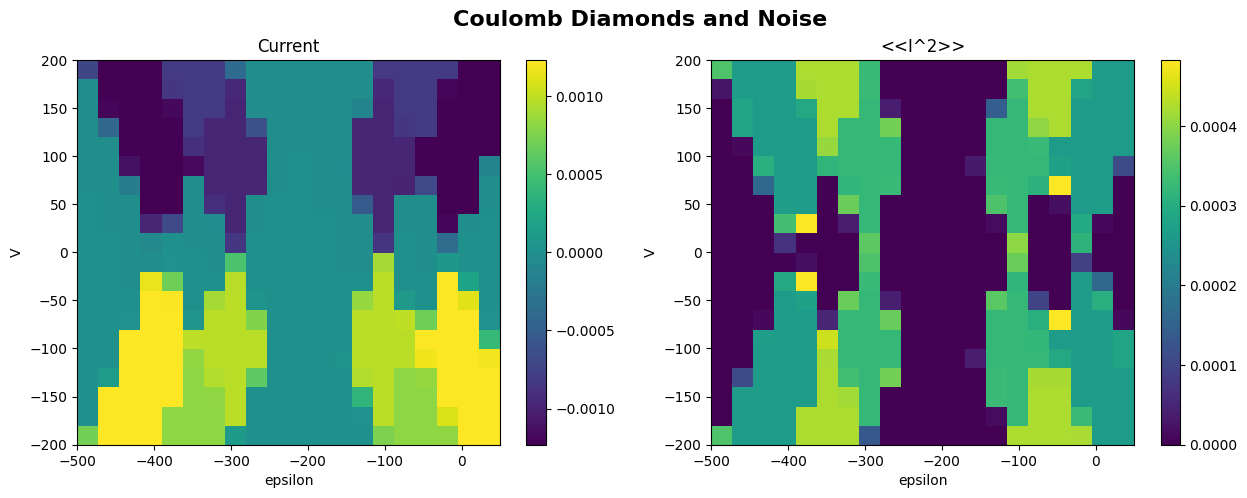

In [68]:
'''
img = plt.imshow(I, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('epsilon')
plt.ylabel('V')
#img.set_clim(-0.1, 0.1)  # Set color limits
plt.show()



#TUR_masked = np.ma.masked_where(TUR >= 2, TUR)

img = plt.imshow(TUR, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('epsilon')
plt.ylabel('V')
#for row in indices:
#    plt.scatter(Epsilon[row[0], row[1]],VB[row[0],row[1]],marker="o")
img.set_clim(0, 100)  # Set color limits
'''

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot on different subplots using the axes array
img = axes[0].imshow(I, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
fig.colorbar(img, ax=axes[0]) 
axes[0].set_title("Current")
axes[0].set_xlabel('epsilon')
axes[0].set_ylabel('V')
#img.set_clim(-0.1, 0.1)  # Set color limits

img = axes[1].imshow(I_var, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
axes[1].set_title("<<I^2>>")
fig.colorbar(img, ax=axes[1]) 
axes[1].set_xlabel('epsilon')
axes[1].set_ylabel('V')

fig.suptitle("Coulomb Diamonds and Noise", fontsize=16, fontweight='bold')
# Adjust layout to prevent overlap
#plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space for suptitle

plt.show()


In [11]:
#ZOOMAR IN PÅ INTRESSANT OMRÅDE:


#--SETUP: ---------------------------------------------------------------------------------
VBs = np.linspace(0,0.5, 20) # np.linspace(-10000,10000, 100)
epsilons = np.linspace(0, 2.1, 20) # np.linspace(-6000, 6000, 10)
#T = 1
T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------

importlib.reload(vs)
I, I_var, J_QH, P, P_0 = vs.run_sweep(VBs, epsilons, **INPUT)

In [12]:
#Beräkna TUR
importlib.reload(tc)
TUR, eff_carnot, eff, sigma = tc.calculate_tur(T_L=T_L, T_R=T_R, I=I, I_var=I_var, J_QH=J_QH, P=P)
print(np.sort(TUR[~np.isnan(TUR)]))

[1.96726733 1.96751655 1.96818514 1.96820855 1.968558   1.96878862
 1.96897147 1.96910363 1.96959517 1.96973981 1.969921   1.97002212
 1.9704954  1.97051292 1.97062731 1.97090552 1.97093988 1.97104395
 1.97107403 1.97129014 1.97165368 1.97166252 1.97185621 1.97207081
 1.9720951  1.97215671 1.97226026 1.97267353 1.97277039 1.97285426
 1.97286666 1.97325851 1.97327004 1.97348112 1.97363981 1.97368145
 1.97368171 1.97368611 1.97410301 1.97426933 1.97434859 1.97442679
 1.97442958 1.97458944 1.97463638 1.97469068 1.97473173 1.97489409
 1.97501737 1.9752145  1.97536664 1.97541176 1.97542618 1.97549286
 1.97557294 1.97568649 1.97581903 1.97600226 1.9760071  1.97608693
 1.97623863 1.97639123 1.97649052 1.97665248 1.97667002 1.97667278
 1.97669936 1.97678936 1.97692611 1.97711263 1.97725922 1.97728382
 1.97730213 1.97754085 1.9775659  1.97757512 1.9776488  1.97780807
 1.97795539 1.97802926 1.97812799 1.97816991 1.97835882 1.9784102
 1.97850211 1.97857641 1.9786116  1.97861381 1.97889831 1.97898